## Notebook using the permuted model for Grad-Cam

### Calculate similarity between the 10 images accross the permuted and unpermuted moddel
You can download the normal model from: https://polybox.ethz.ch/index.php/s/RCyBO2038Aph6Cz

and the permuted model from: https://polybox.ethz.ch/index.php/s/Re3jCg0C9QvIvzm

The 10 images used are those that you can find here: https://polybox.ethz.ch/index.php/s/7eLrhKFe34UW3tW

In [1]:
from torch.utils import data
import torchvision
from models.grad_cam import CNN_grad_cam, display_datasets_heatmap
import torch
import torchvision.transforms as transforms


In [2]:
model_permuted = torch.load('models/model_permuted.pth')

In [3]:
mean1 =torch.tensor([0.5763, 0.5763, 0.5763])
std1  =torch.tensor([0.1453, 0.1453, 0.1453])
std_normalise_1 = transforms.Normalize(
    mean=mean1,
    std=std1
)

trans1 = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.Grayscale(num_output_channels=3),
        transforms.ToTensor(),
        std_normalise_1
])

In [4]:
data_for_saliency_maps =  torchvision.datasets.ImageFolder('img_for_saliency', transform=trans1)
dataloader_grad_cam = data.DataLoader(data_for_saliency_maps, shuffle=False, batch_size=1)

## Grad cam

In [5]:
model_permuted_grad_cam = CNN_grad_cam(model_permuted)

0 0
1 0
1 0
1 0
1 0
1 1
1 1
1 1
1 1
1 1


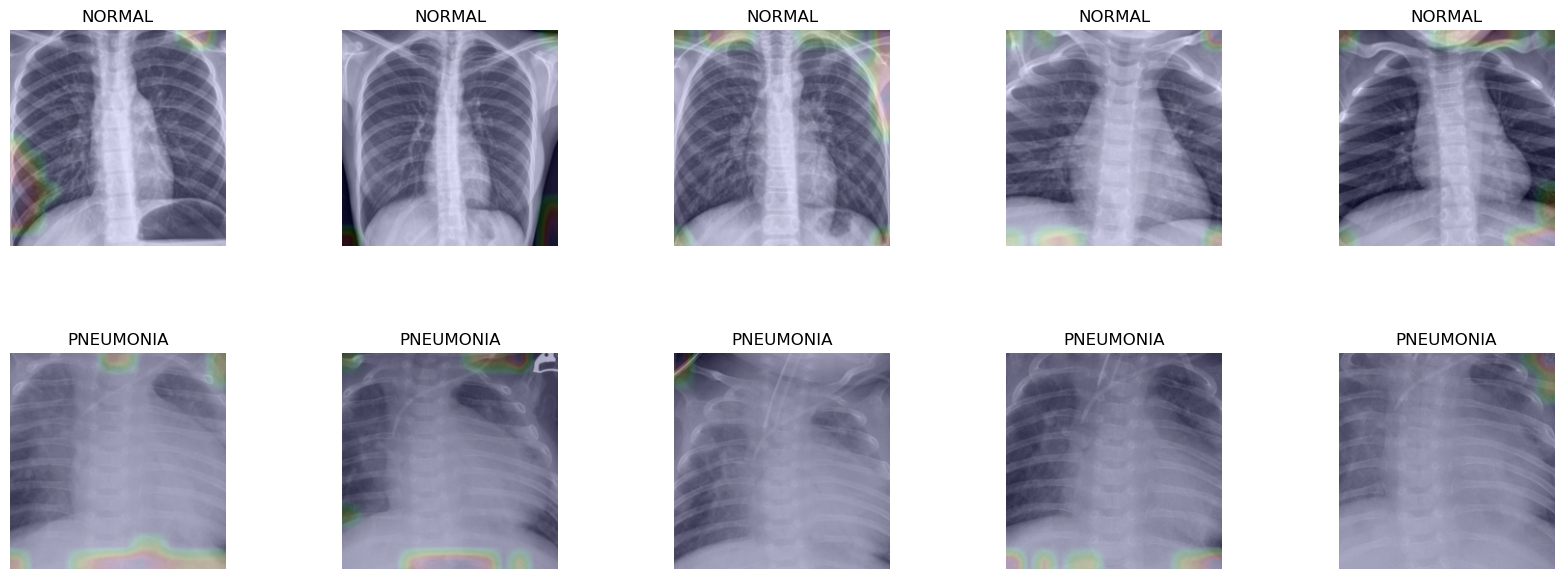

In [8]:
display_datasets_heatmap(model_permuted_grad_cam, dataloader_grad_cam, threshold=.4)

If you want an output without tresholds on the heatmap use display_datasets_heatmap(...., threshold= 0)